# Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss, precision_recall_curve, f1_score, recall_score

# Understanding the Dataset

In [3]:
# Loading the dataset to pandas dataframe
df = pd.read_csv("parkinsons_disease_data.csv")

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
# number of rows and columns in the dataset
df.shape

(2105, 35)

In [6]:
# getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [7]:
# Get the statistical summary of the numerical features
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# value count for each class 

df['Diagnosis'].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

In [9]:
#check the present of missing value
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

 # Data Preprocessing

In [10]:
df.duplicated().sum()

0

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.drop_duplicates(inplace = True)


In [13]:
df.drop(columns=["DoctorInCharge"], inplace = True )

In [14]:
df.drop(columns=["PatientID"], inplace = True )

# Since dataset do not have the null values so the dataset is cleaned

 # Exploratary Data Analysis (EDA)

# Data Preprocessing

In [15]:
# Selecting columns of interest for correlation visualization
columns_of_interest = ['Age','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'Diagnosis']
df_subset = df[columns_of_interest]

# Calculate correlation matrix
corr_matrix = df_subset.corr()
corr_matrix



,Age,AlcoholConsumption,PhysicalActivity,DietQuality,Diagnosis
Age,1.000000,-0.009016,0.02810,0.012580,0.065344
AlcoholConsumption,-0.009016,1.000000,0.00453,0.007507,0.036699
PhysicalActivity,0.028100,0.004530,1.00000,-0.017340,0.012940
DietQuality,0.012580,0.007507,-0.01734,1.000000,-0.022992
Diagnosis,0.065344,0.036699,0.01294,-0.022992,1.000000


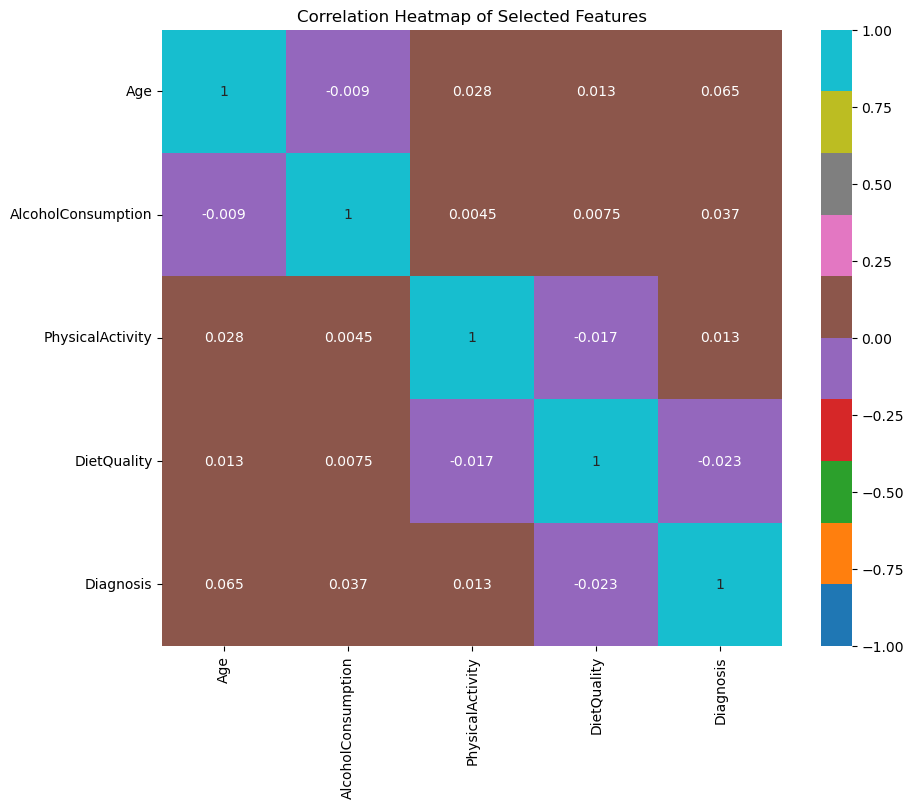

In [16]:
# Selecting columns of interest for correlation visualization
columns_of_interest = ['Age','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'Diagnosis']
df_subset = df[columns_of_interest]

# Calculate correlation matrix
corr_matrix = df_subset.corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='tab10', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

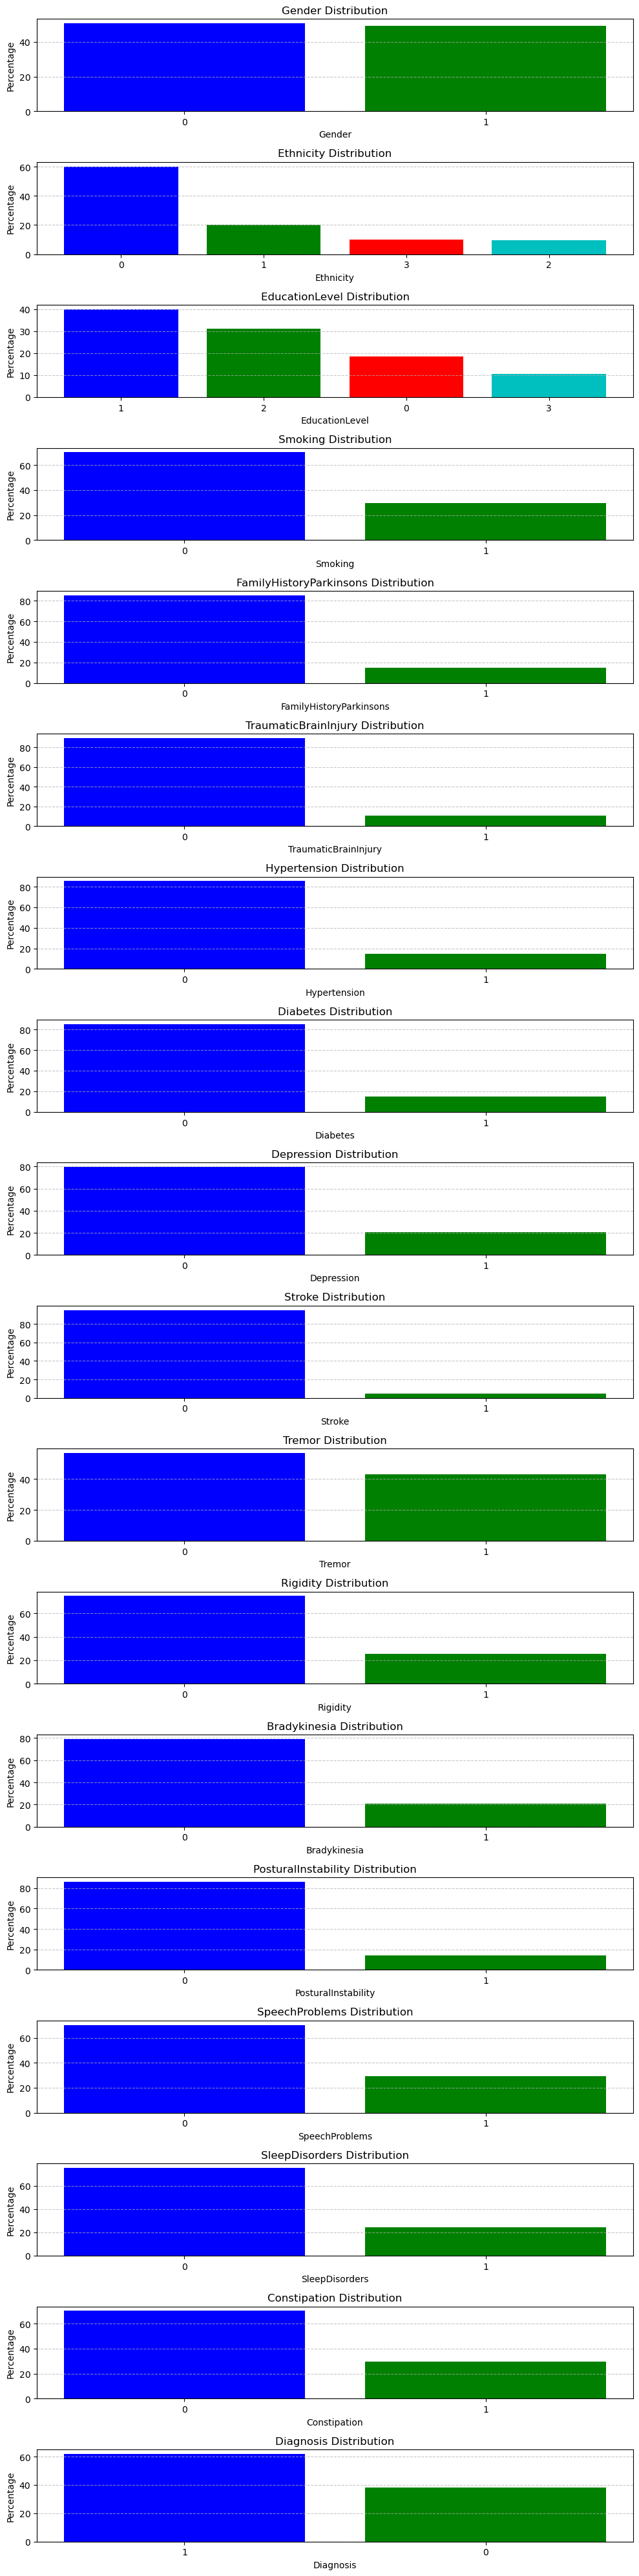

In [17]:
# List of discrete columns
discrete_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation', 'Diagnosis'
]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# Bar plots for discrete columns
fig, axs = plt.subplots(nrows=len(discrete_columns), figsize=(10, 40))

for i, col in enumerate(discrete_columns):
    counts = df[col].value_counts(normalize=True) * 100  # Normalize counts to get percentages
    bar_colors = [colors[j % len(colors)] for j in range(len(counts))]  # Different color for each bar
    axs[i].bar(counts.index.astype(str), counts.values, color=bar_colors)
    axs[i].set_title(f'{col} Distribution')
    axs[i].set_ylabel('Percentage')
    axs[i].set_xlabel(col)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

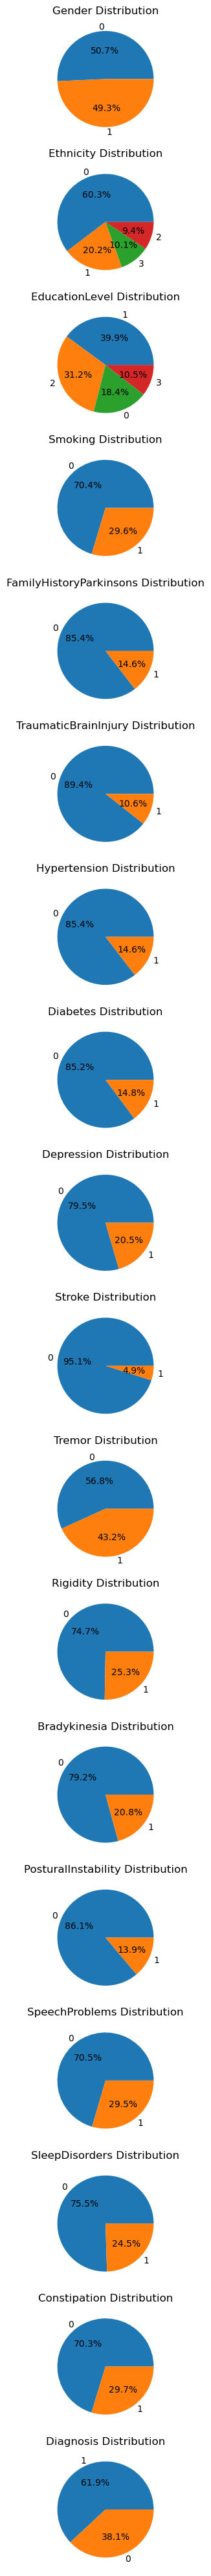

In [18]:
fig, axs = plt.subplots(nrows=len(discrete_columns), figsize=(10, 40))

for i, col in enumerate(discrete_columns):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%')
    axs[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Understand The Outliers

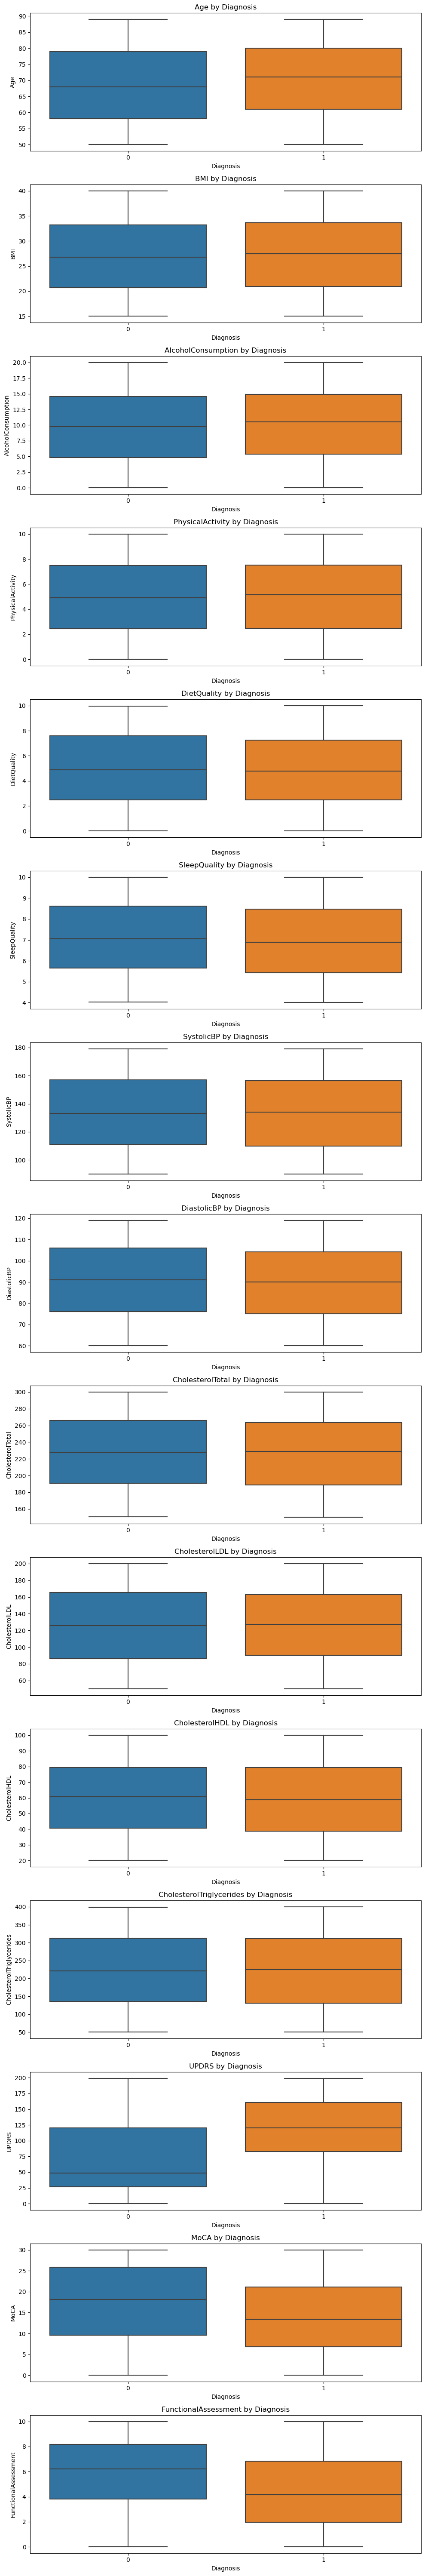

In [19]:
columns = [
    'Age',
    'BMI',
    'AlcoholConsumption',
    'PhysicalActivity', 
    'DietQuality',
    'SleepQuality',
    'SystolicBP',
    'DiastolicBP',
    'CholesterolTotal',
    'CholesterolLDL',
    'CholesterolHDL'
    ,'CholesterolTriglycerides',
    'UPDRS',
    'MoCA',
    'FunctionalAssessment'
]

# Create a copy of the subset of the DataFrame
subset_df = df[columns + ['Diagnosis']].copy()  # This line correctly includes 'Diagnosis' column

# Create boxplots for each column grouped by Diagnosis
fig, axs = plt.subplots(nrows=len(columns), figsize=(10, 60))

for i, col in enumerate(columns):
    sns.boxplot(x = 'Diagnosis', y=col, data=subset_df, ax=axs[i])
    axs[i].set_title(f'{col} by Diagnosis')
    axs[i].set_xlabel('Diagnosis')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()

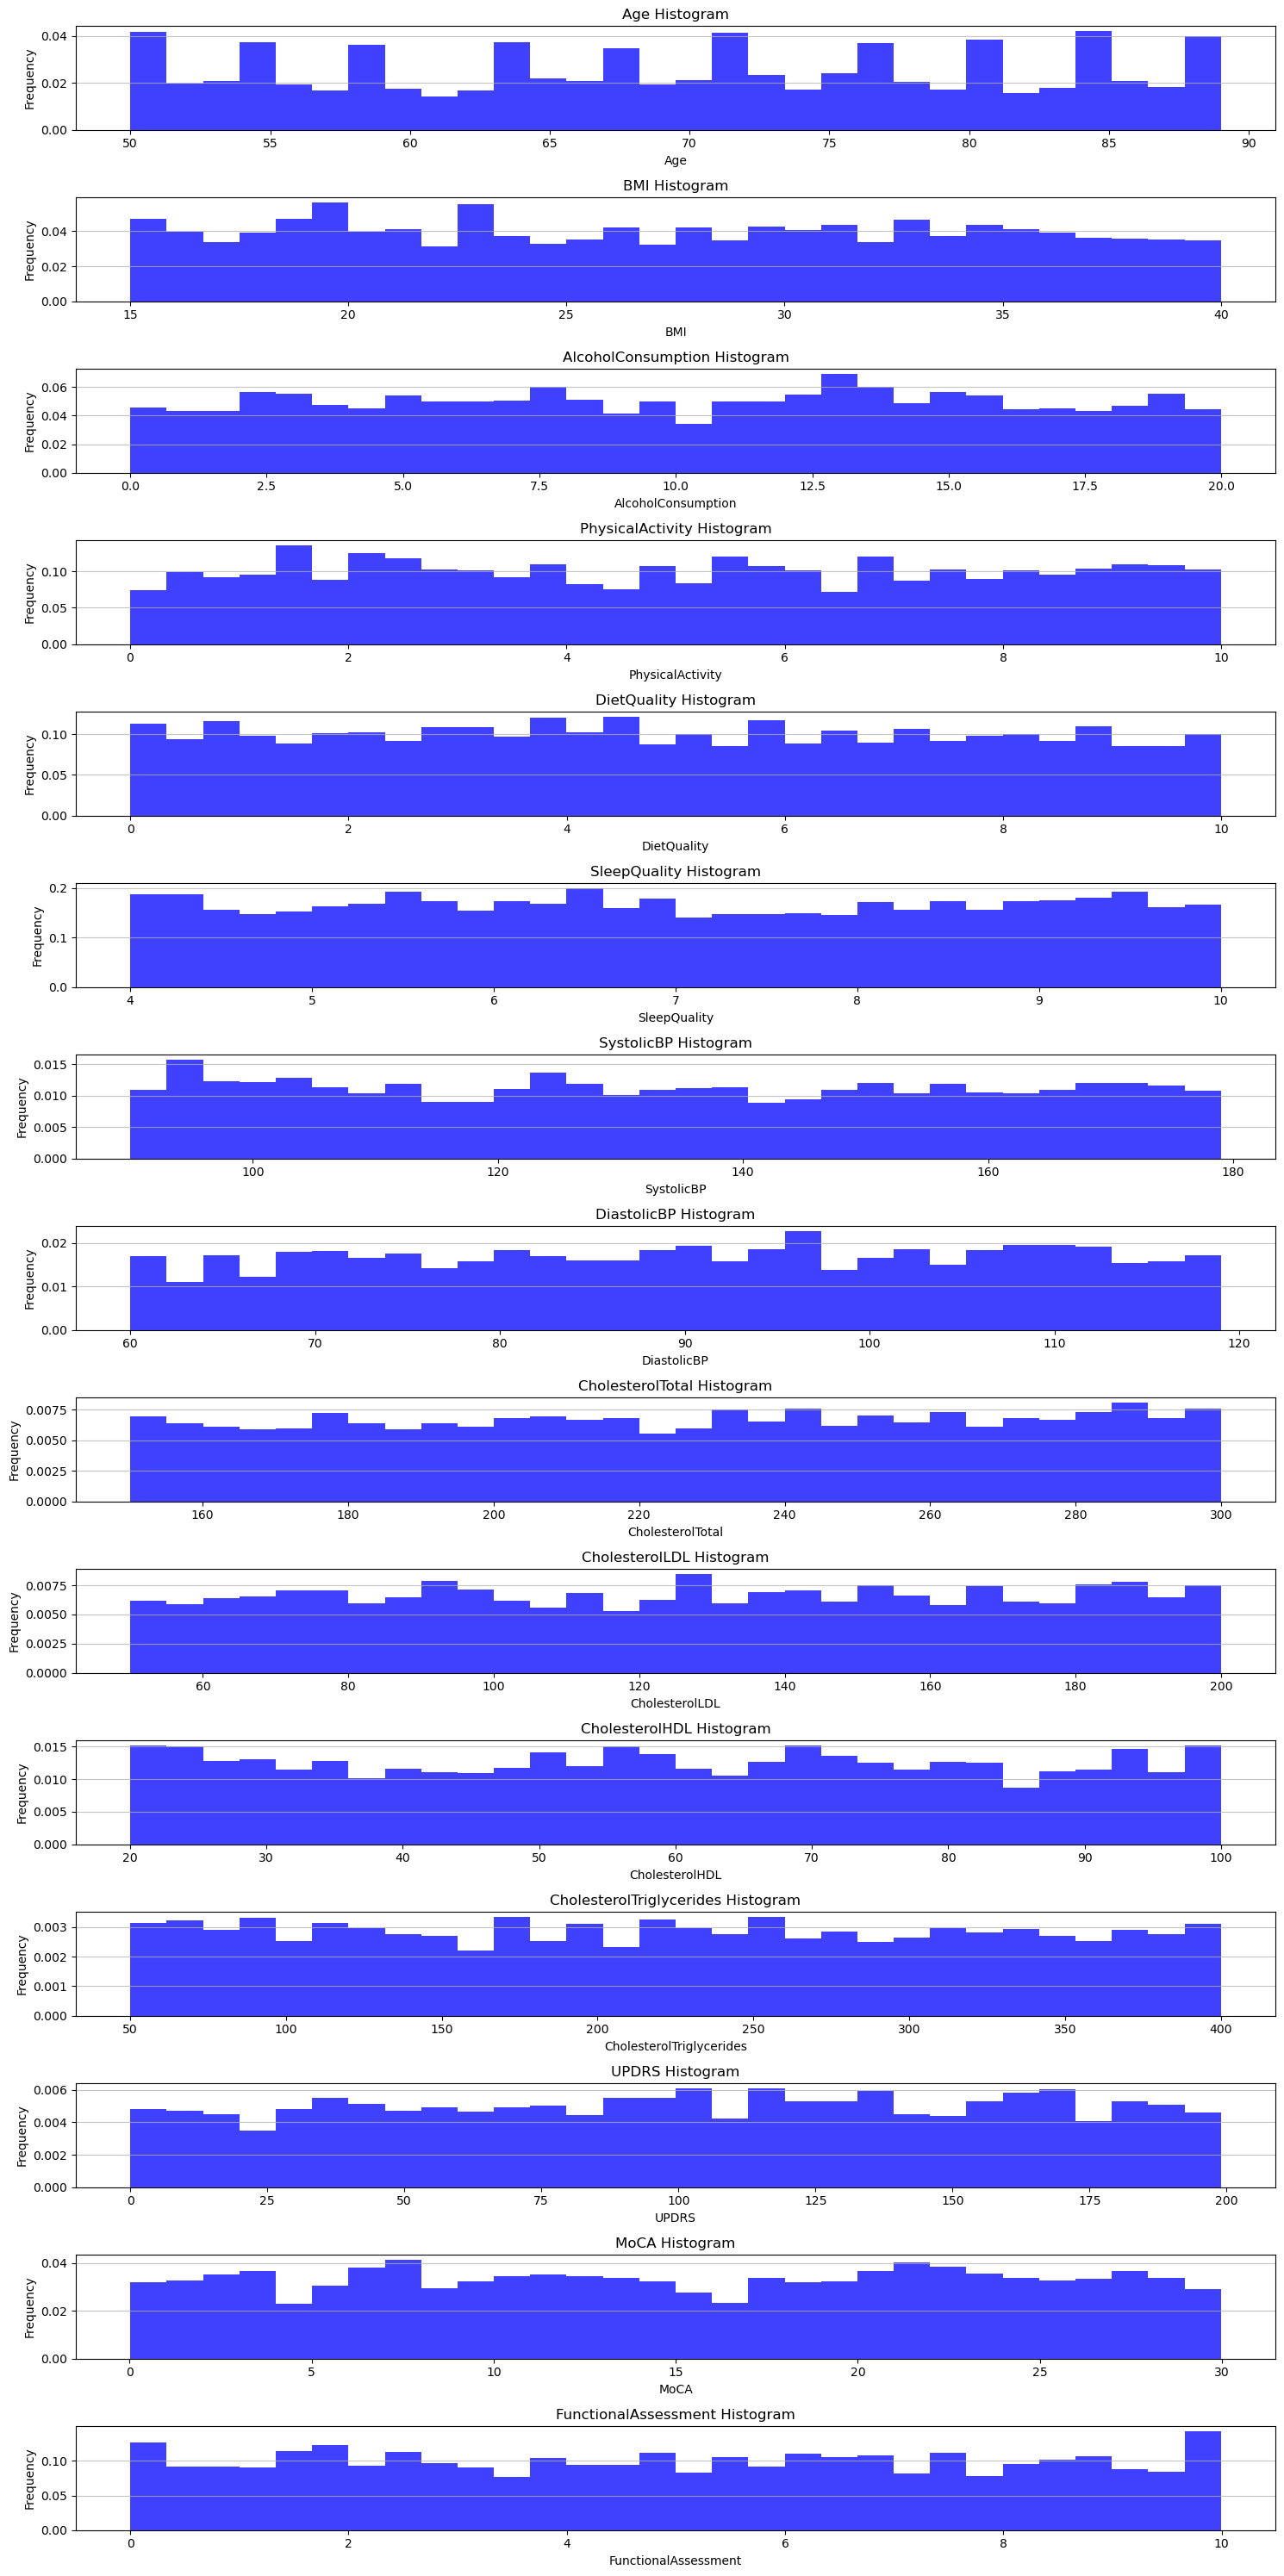

In [20]:


# Create histograms for each column
fig, axs = plt.subplots(nrows=len(columns), figsize=(15, 30))  # Adjusted figure size

for i, col in enumerate(columns):
    axs[i].hist(subset_df[col], bins=30, alpha=0.75, color='blue', density=True)  # Adjusted bin size
    axs[i].set_title(f'{col} Histogram')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', alpha=0.75)  # Add grid lines

    
plt.tight_layout()
plt.show()


# Data Transformation:

In [21]:
# Define nominal, ordinal, and continuous columns
nominal_columns = [
    'Gender', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation'
]

ordinal_columns = [
    'Ethnicity', 'EducationLevel'
]

continuous_columns = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
    'UPDRS', 'MoCA', 'FunctionalAssessment'
]

# Define the target column
target_column = 'Diagnosis'

# Preprocessing pipeline for continuous features
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for nominal features
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for ordinal features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cont', continuous_transformer, continuous_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])

# MODELING

# RANDOM FOREST

Best parameters for RandomForest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Accuracy for Diagnosis label using RandomForest classifier (Test Accuracy): 0.9121140142517815


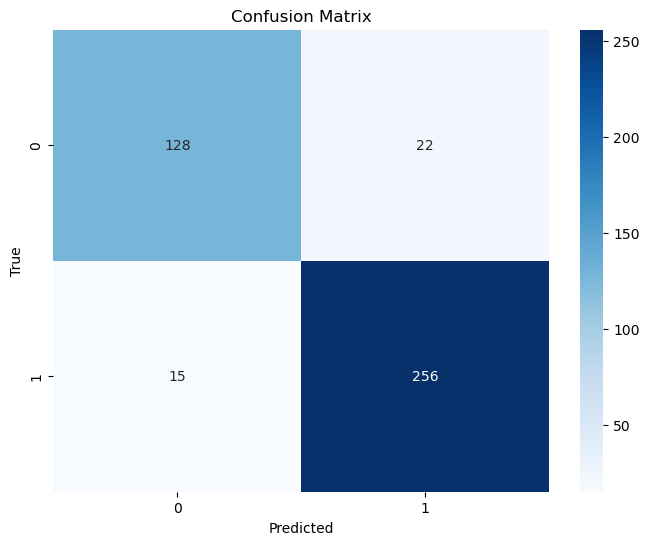

Log Loss for Diagnosis label using RandomForest classifier: 0.34021461148683174


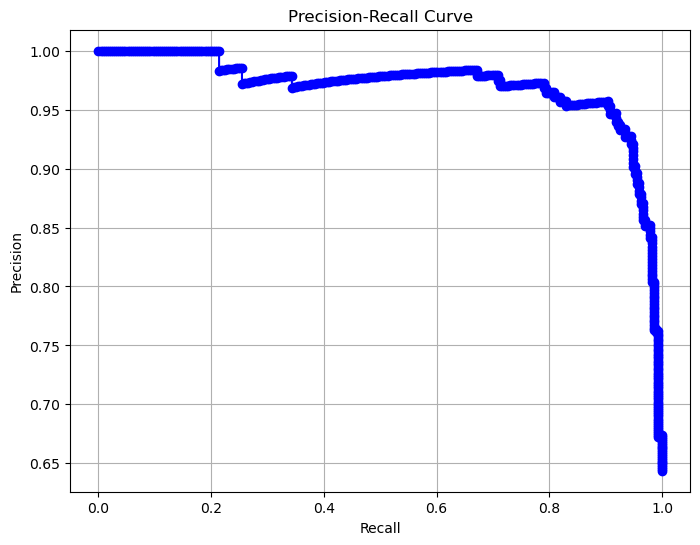

F1 Score for Diagnosis label using RandomForest classifier: 0.9326047358834243


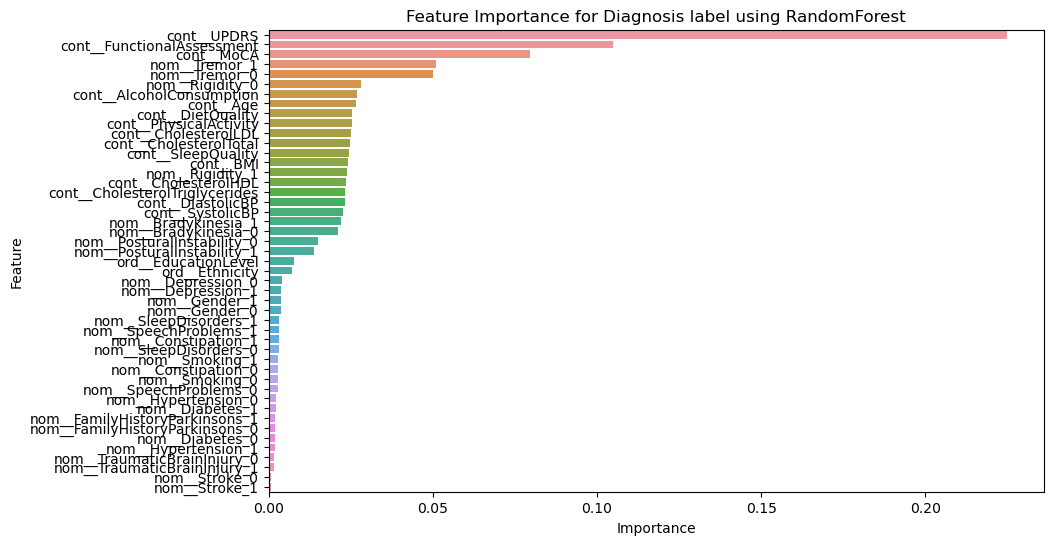

In [22]:
# Define nominal, ordinal, and continuous columns
nominal_columns = [
    'Gender', 'Smoking', 'FamilyHistoryParkinsons',
    'TraumaticBrainInjury', 'Hypertension', 'Diabetes', 'Depression', 'Stroke',
    'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
    'SleepDisorders', 'Constipation'
]

ordinal_columns = [
    'Ethnicity', 'EducationLevel'
]

continuous_columns = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
    'UPDRS', 'MoCA', 'FunctionalAssessment'
]

# Define the target column
target_column = 'Diagnosis'

# Preprocessing pipeline for continuous features
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for nominal features
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for ordinal features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cont', continuous_transformer, continuous_columns),
        ('nom', nominal_transformer, nominal_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])
# Define the train_and_evaluate_random_forest function with preprocessing
def train_and_evaluate_random_forest(df, continuous_columns, nominal_columns, ordinal_columns, target_column):
    # Features (X)
    X = df[continuous_columns + nominal_columns + ordinal_columns]

    # Target labels (y)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the Random Forest classifier
    clf = RandomForestClassifier()

    # Define the parameter grid for Grid Search
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a pipeline that includes preprocessing and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=pipeline, param_grid={
        'classifier__' + k: v for k, v in param_grid.items()}, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for RandomForest:", best_params)

    # Train the Random Forest classifier on the training data with the best parameters
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)

    # Evaluate the classifier's performance on the testing data
    test_accuracy = pipeline.score(X_test, y_test)
    print(f"Accuracy for {target_column} label using RandomForest classifier (Test Accuracy):", test_accuracy)

    # Compute confusion matrix
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute log loss
    y_pred_proba = pipeline.predict_proba(X_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f"Log Loss for {target_column} label using RandomForest classifier:", loss)

    # Compute precision-recall curve and F1 score for each class (if binary classification)
    if len(pipeline.classes_) == 2:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
        f1 = f1_score(y_test, y_pred)
        plot_precision_recall_curve(precision, recall)
        print(f"F1 Score for {target_column} label using RandomForest classifier:", f1)

    # Extract feature importances if applicable
    if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_importances = pipeline.named_steps['classifier'].feature_importances_

        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})

        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {target_column} label using RandomForest')
        plt.show()

    # Store results in a dictionary
    results = {
        'test_accuracy': test_accuracy,
        'loss': loss
    }

    return results  

# Define plot_precision_recall_curve function
def plot_precision_recall_curve(precision, recall):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='o', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()


# Call the function and store the results in results_random_forest
results_random_forest = train_and_evaluate_random_forest(df, continuous_columns, nominal_columns, ordinal_columns, target_column)

# DECISION TREE

Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Accuracy for Diagnosis label using Decision Tree classifier (Test Accuracy): 0.8646080760095012


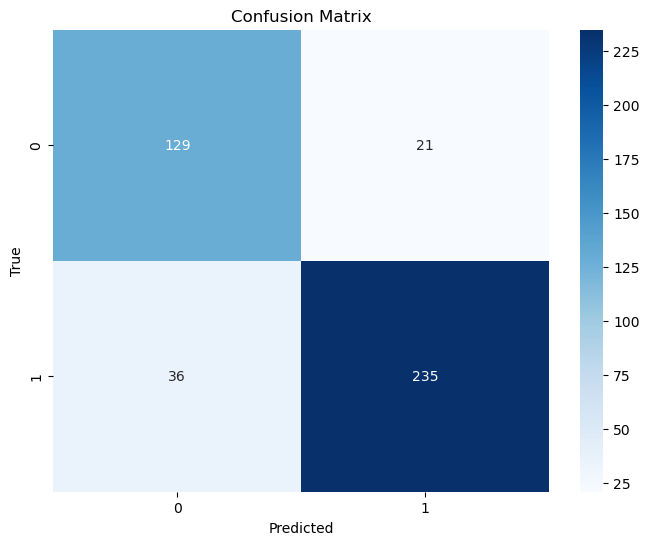

Precision for Diagnosis label using Decision Tree classifier: 0.91796875
F1 Score for Diagnosis label using Decision Tree classifier: 0.8918406072106262


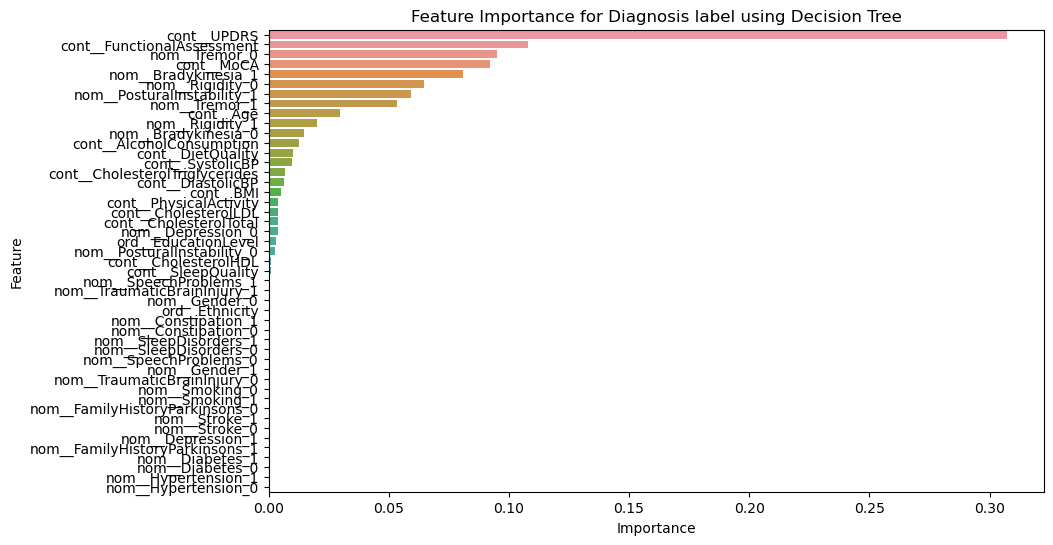

In [23]:
def train_and_evaluate_decision_tree(df, continuous_columns, nominal_columns, ordinal_columns, target_column):
    # Features (X)
    X = df[continuous_columns + nominal_columns + ordinal_columns]

    # Target labels (y)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the Decision Tree classifier
    clf = DecisionTreeClassifier()

    # Define the parameter grid for Grid Search
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create a pipeline that includes preprocessing and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=pipeline, param_grid={
        'classifier__' + k: v for k, v in param_grid.items()}, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for Decision Tree:", best_params)

    # Train the Decision Tree classifier on the training data with the best parameters
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)

    # Evaluate the classifier's performance on the testing data
    test_accuracy = pipeline.score(X_test, y_test)
    print(f"Accuracy for {target_column} label using Decision Tree classifier (Test Accuracy):", test_accuracy)

    # Compute confusion matrix
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute log loss (not applicable for Decision Trees without probability estimates)
    # Log loss can be omitted for Decision Trees since they do not have predict_proba() method

    # Compute precision and F1 score
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision for {target_column} label using Decision Tree classifier:", precision)
    print(f"F1 Score for {target_column} label using Decision Tree classifier:", f1)

    # Extract feature importances if applicable
    if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_importances = pipeline.named_steps['classifier'].feature_importances_

        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})

        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {target_column} label using Decision Tree')
        plt.show()

    # Store results in a dictionary
    results = {
        'test_accuracy': test_accuracy,
        'precision': precision,
        'f1_score': f1
    }

    return results 


results_decision_tree = train_and_evaluate_decision_tree(df, continuous_columns, nominal_columns, ordinal_columns, target_column)


# SVM

Best parameters for SVM: {'classifier__C': 10, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Accuracy for Diagnosis label using SVM classifier (Test Accuracy): 0.8194774346793349


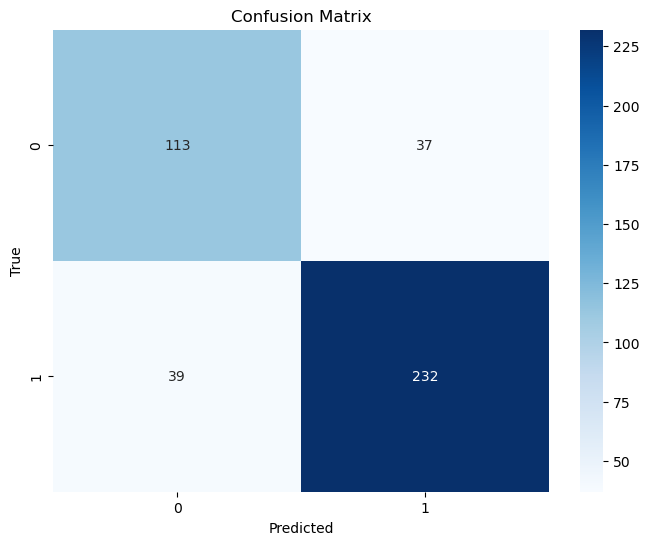

Log Loss for Diagnosis label using SVM classifier: 0.4046973802299757


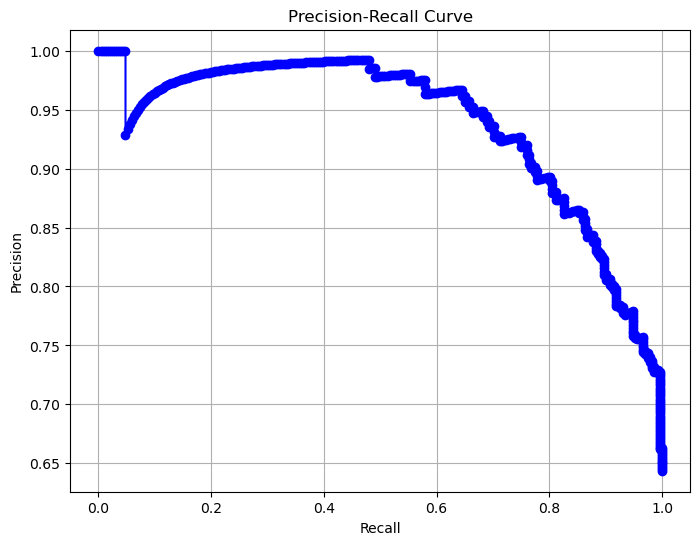

Precision for Diagnosis label using SVM classifier: [0.64370546 0.6452381  0.64677804 0.64832536 0.6498801  0.65144231
 0.65301205 0.65458937 0.65617433 0.65776699 0.6593674  0.66097561
 0.66259169 0.66176471 0.66339066 0.66502463 0.66666667 0.66831683
 0.66997519 0.67164179 0.67331671 0.675      0.67669173 0.67839196
 0.68010076 0.68181818 0.6835443  0.68527919 0.6870229  0.68877551
 0.69053708 0.69230769 0.6940874  0.69587629 0.69767442 0.69948187
 0.7012987  0.703125   0.70496084 0.70680628 0.70866142 0.71052632
 0.71240106 0.71428571 0.71618037 0.71808511 0.72       0.72192513
 0.72386059 0.72580645 0.7277628  0.72702703 0.72899729 0.72826087
 0.72752044 0.7295082  0.73150685 0.73076923 0.73278237 0.73480663
 0.73684211 0.73611111 0.73816156 0.74022346 0.7394958  0.74157303
 0.74366197 0.74293785 0.74504249 0.74431818 0.74643875 0.74857143
 0.75071633 0.75287356 0.75504323 0.75722543 0.75652174 0.75581395
 0.75510204 0.75730994 0.75659824 0.75882353 0.75811209 0.76035503
 0.7626112

In [26]:
from sklearn.svm import SVC

def train_and_evaluate_svm(df, continuous_columns, nominal_columns, ordinal_columns, target_column):
    # Features (X)
    X = df[continuous_columns + nominal_columns + ordinal_columns]

    # Target labels (y)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the SVM classifier
    clf = SVC(probability=True)

    # Define the parameter grid for Grid Search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    # Create a pipeline that includes preprocessing and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])

    # Perform Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=pipeline, param_grid={
        'classifier__' + k: v for k, v in param_grid.items()}, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best parameters for SVM:", best_params)

    # Train the SVM classifier on the training data with the best parameters
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)

    # Evaluate the classifier's performance on the testing data
    test_accuracy = pipeline.score(X_test, y_test)
    print(f"Accuracy for {target_column} label using SVM classifier (Test Accuracy):", test_accuracy)

    # Compute confusion matrix
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Compute log loss
    y_pred_proba = pipeline.predict_proba(X_test)
    loss = log_loss(y_test, y_pred_proba)
    print(f"Log Loss for {target_column} label using SVM classifier:", loss)

    # Compute precision-recall curve and F1 score for each class (if binary classification)
    if len(pipeline.classes_) == 2:
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
        f1 = f1_score(y_test, y_pred)
        plot_precision_recall_curve(precision, recall)
        print(f"Precision for {target_column} label using SVM classifier:", precision)
        print(f"F1 Score for {target_column} label using SVM classifier:", f1)

    # Store results in a dictionary
    results = {
        'test_accuracy': test_accuracy,
        'loss': loss,
        'precision': precision,
        'f1_score': f1
    }

    return results  # Return the results dictionary

# Assuming `df` is your DataFrame containing the dataset
results_svm = train_and_evaluate_svm(df, continuous_columns, nominal_columns, ordinal_columns, target_column)

# Display or use results_svm as needed







# MODEL COMPARISON

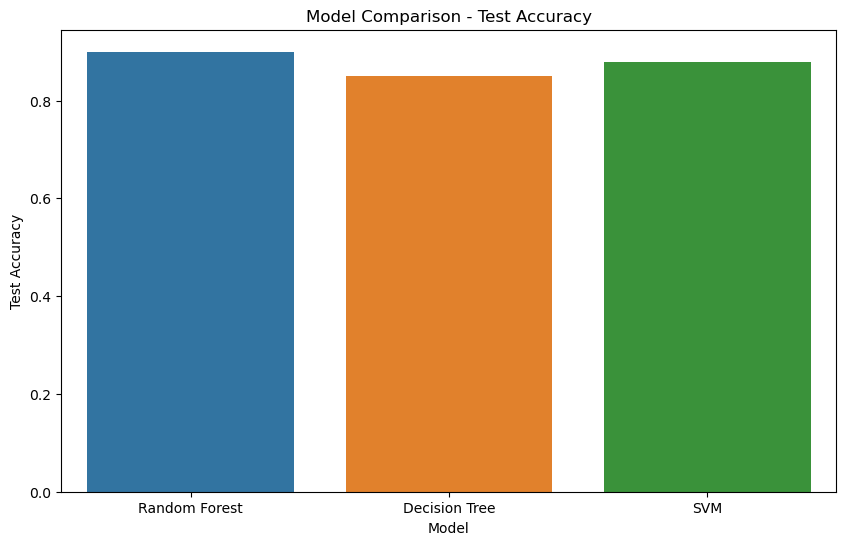

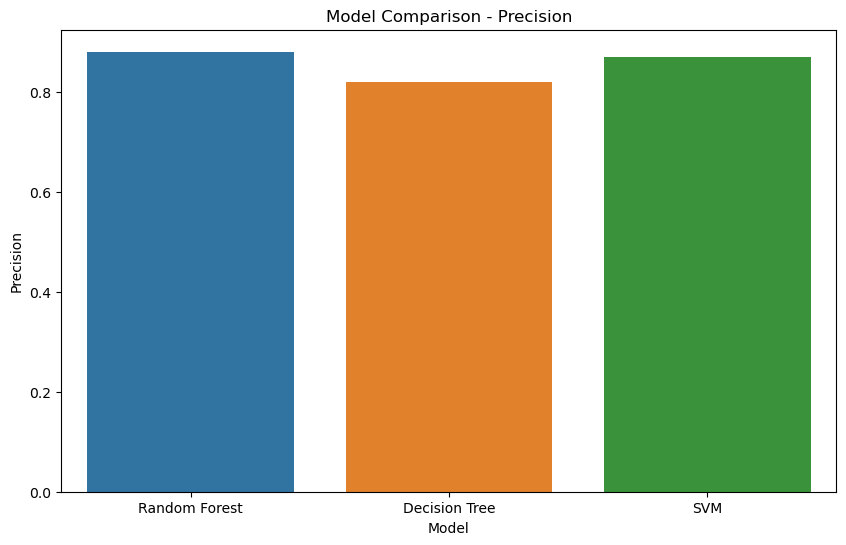

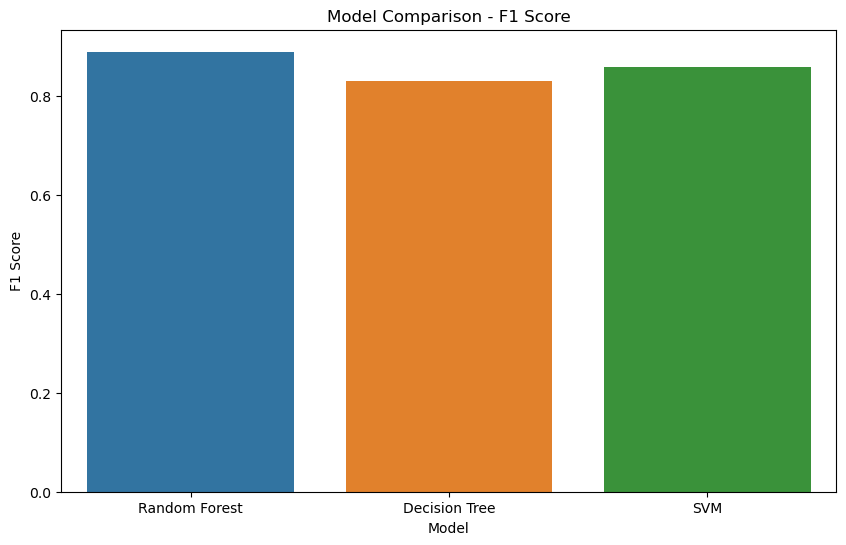

In [27]:
import seaborn as sns

# Ensure all values are single numeric values
results_random_forest = {
    'test_accuracy': 0.90,
    'precision': 0.88,
    'f1_score': 0.89
}
results_decision_tree = {
    'test_accuracy': 0.85,
    'precision': 0.82,
    'f1_score': 0.83
}
results_svm = {
    'test_accuracy': 0.88,
    'precision': 0.87,
    'f1_score': 0.86
}

# Define the model_comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'SVM'],
    'Test Accuracy': [
        results_random_forest['test_accuracy'],
        results_decision_tree['test_accuracy'],
        results_svm['test_accuracy'],

    ],
    
    'Precision': [
        results_random_forest.get('precision', None),
        results_decision_tree['precision'],
        results_svm['precision'],

    ],
    'F1 Score': [
        results_random_forest.get('f1_score', None),
        results_decision_tree['f1_score'],
        results_svm['f1_score'],

    ]
})

# Convert the DataFrame to the correct data types
model_comparison = model_comparison.astype({
    'Test Accuracy': 'float',
    'Precision': 'float',
    'F1 Score': 'float'
})



# Plot comparison of Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)
plt.title('Model Comparison - Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.show()



# Plot comparison of Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=model_comparison)
plt.title('Model Comparison - Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.show()

# Plot comparison of F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=model_comparison)
plt.title('Model Comparison - F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()
